In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing And Visualizing Data

In [2]:
dataset = pd.read_csv('data/customers.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [4]:
dataset.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


Text(0.5, 1.0, 'We will go with OneHotEncoder Here')

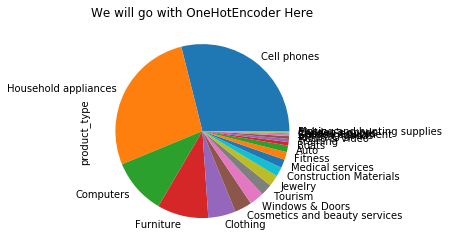

In [5]:
dataset['product_type'].value_counts().plot(kind='pie')
plt.title('We will go with OneHotEncoder Here')

Text(0.5, 1.0, 'We will go with OrdiNalEncoder Here')

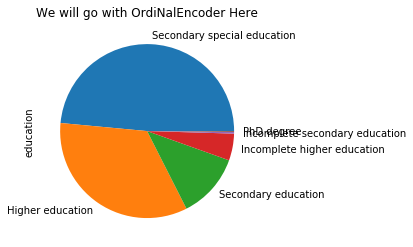

In [6]:
dataset['education'].value_counts().plot(kind='pie')
plt.title('We will go with OrdiNalEncoder Here')

Text(0.5, 1.0, 'We will go with OrdiNalEncoder Here')

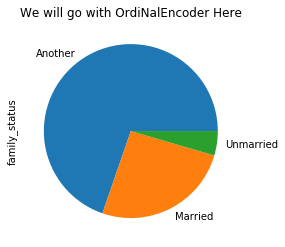

In [7]:
dataset['family_status'].value_counts().plot(kind='pie')
plt.title('We will go with OrdiNalEncoder Here') # We Will Need Dummies here too.

Text(0.5, 1, 'Correlation Between Data')

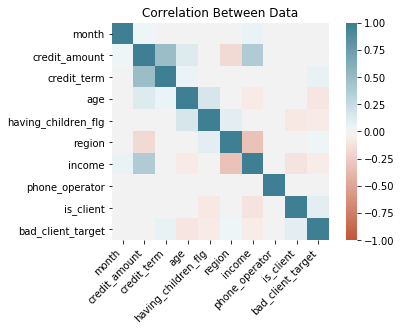

In [8]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Between Data')

In [9]:
# We can see some kind of correlation between Income & Credit Amount.
# There are some negative & Positive Correlations Lets Visualize Them !

In [10]:
print(dataset['income'].dtype)
print(dataset['credit_term'].dtype)
"""
Just testing somethings.
"""

int64
int64


'\nJust testing somethings.\n'

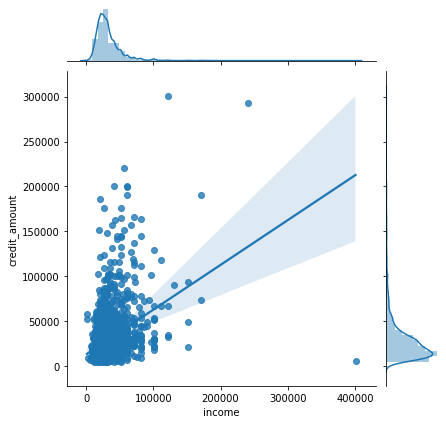

In [11]:
# Regression Graph Between Income & Credit Amount
sns.jointplot('income', 'credit_amount', data=dataset, kind='reg') 

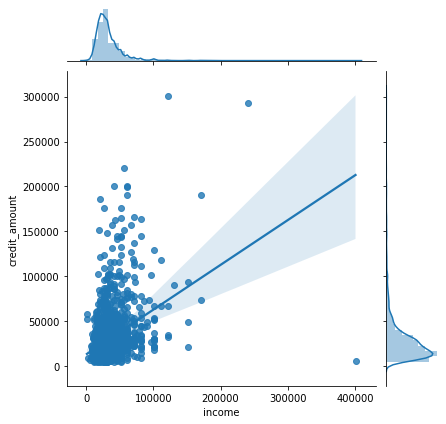

In [12]:
# Regression Graph Between Income & Credit Amount
sns.jointplot('income', 'credit_amount', data=dataset, kind='reg') 

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature Engineering (Prep For Pipeline)

In [14]:
dataset_test = dataset.copy()

In [15]:
data_x = dataset_test.drop('bad_client_target',1)
data_y = dataset_test['bad_client_target']

In [16]:
data_x.head()

,month,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client
0,1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0
1,1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1
2,1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0
3,1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1
4,1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1


In [17]:
label_encoder = LabelEncoder()

In [18]:
data_x.columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client'],
      dtype='object')

In [19]:
data_x_num = data_x.select_dtypes(['int64', 'float64'])
data_x_cat = data_x.select_dtypes(['object'])

In [20]:
data_x_num

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client
0,1,7000,12,39,0,2,21000,0,0
1,1,19000,6,20,1,2,17000,3,1
2,1,29000,12,23,0,2,31000,2,0
3,1,10000,12,30,1,2,31000,3,1
4,1,14500,12,25,0,2,26000,0,1
...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,1,2,46000,1,1
1719,12,6500,6,24,0,2,18000,0,1
1720,12,5500,12,21,0,2,15000,1,1
1721,12,30500,10,25,0,2,41000,2,1


In [21]:
sex_dummies = pd.get_dummies(data_x_cat['sex'], drop_first = True)
product_dummies = pd.get_dummies(data_x_cat['product_type'], drop_first = True)
family_dummies = pd.get_dummies(data_x_cat['family_status'], drop_first = True)

In [22]:
data_x_cat = data_x_cat.join([sex_dummies, product_dummies, family_dummies])

In [23]:
data_x_cat

,sex,education,product_type,family_status,male,Auto,Boats,Cell phones,Childen's goods,Clothing,...,Jewelry,Medical services,Music,Repair Services,Sporting goods,Tourism,Training,Windows & Doors,Married,Unmarried
0,male,Secondary special education,Cell phones,Another,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,male,Secondary special education,Household appliances,Another,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,female,Secondary special education,Household appliances,Another,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,Secondary special education,Cell phones,Unmarried,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,female,Higher education,Cell phones,Married,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,male,Higher education,Cell phones,Another,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,male,Secondary special education,Cell phones,Another,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,male,Incomplete higher education,Cell phones,Another,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1721,female,Incomplete higher education,Cell phones,Another,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data_x_cat = data_x_cat.drop(['sex', 'product_type', 'family_status'], 1)

In [25]:
data_x_cat['education'] = label_encoder.fit_transform(data_x_cat['education'])

In [26]:
data_x_cat # Perfect !

,education,male,Auto,Boats,Cell phones,Childen's goods,Clothing,Computers,Construction Materials,Cosmetics and beauty services,...,Jewelry,Medical services,Music,Repair Services,Sporting goods,Tourism,Training,Windows & Doors,Married,Unmarried
0,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,5,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1721,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_x_num

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client
0,1,7000,12,39,0,2,21000,0,0
1,1,19000,6,20,1,2,17000,3,1
2,1,29000,12,23,0,2,31000,2,0
3,1,10000,12,30,1,2,31000,3,1
4,1,14500,12,25,0,2,26000,0,1
...,...,...,...,...,...,...,...,...,...
1718,12,18500,6,32,1,2,46000,1,1
1719,12,6500,6,24,0,2,18000,0,1
1720,12,5500,12,21,0,2,15000,1,1
1721,12,30500,10,25,0,2,41000,2,1


In [28]:
scaler = StandardScaler()

In [29]:
data_x_num = pd.DataFrame(scaler.fit_transform(data_x_num), columns=data_x_num.columns)

In [30]:
data_x_num # Perfect !

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client
0,-1.613637,-0.797483,0.069240,0.235447,-0.865586,0.452567,-0.557339,-1.108156,-1.236973
1,-1.613637,-0.367663,-0.847286,-1.213122,1.155287,0.452567,-0.748661,1.845975,0.808425
2,-1.613637,-0.009479,0.069240,-0.984400,-0.865586,0.452567,-0.079033,0.861264,-1.236973
3,-1.613637,-0.690028,0.069240,-0.450717,1.155287,0.452567,-0.079033,1.845975,0.808425
4,-1.613637,-0.528845,0.069240,-0.831919,-0.865586,0.452567,-0.318186,-1.108156,0.808425
...,...,...,...,...,...,...,...,...,...
1718,1.495998,-0.385572,-0.847286,-0.298236,1.155287,0.452567,0.638426,-0.123446,0.808425
1719,1.495998,-0.815392,-0.847286,-0.908160,-0.865586,0.452567,-0.700831,-1.108156,0.808425
1720,1.495998,-0.851210,0.069240,-1.136881,-0.865586,0.452567,-0.844322,-0.123446,0.808425
1721,1.495998,0.044248,-0.236268,-0.831919,-0.865586,0.452567,0.399273,0.861264,0.808425


In [31]:
data_x_copy = data_x_num.join([data_x_cat])

In [32]:
data_x = data_x_copy

In [33]:
data_x.head() # Perfect

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,education,...,Jewelry,Medical services,Music,Repair Services,Sporting goods,Tourism,Training,Windows & Doors,Married,Unmarried
0,-1.613637,-0.797483,0.069240,0.235447,-0.865586,0.452567,-0.557339,-1.108156,-1.236973,5,...,0,0,0,0,0,0,0,0,0,0
1,-1.613637,-0.367663,-0.847286,-1.213122,1.155287,0.452567,-0.748661,1.845975,0.808425,5,...,0,0,0,0,0,0,0,0,0,0
2,-1.613637,-0.009479,0.069240,-0.984400,-0.865586,0.452567,-0.079033,0.861264,-1.236973,5,...,0,0,0,0,0,0,0,0,0,0
3,-1.613637,-0.690028,0.069240,-0.450717,1.155287,0.452567,-0.079033,1.845975,0.808425,5,...,0,0,0,0,0,0,0,0,0,1
4,-1.613637,-0.528845,0.069240,-0.831919,-0.865586,0.452567,-0.318186,-1.108156,0.808425,0,...,0,0,0,0,0,0,0,0,1,0


# Creating Train & Test Dataset

In [34]:
train_x,test_x,train_y,test_y = train_test_split(data_x, data_y, test_size = 0.25, random_state = 42)

In [35]:
print(f"""Train X-Y: {len(train_x)} - {np.ceil(len(train_x) / len(data_x) * 100)} % Of Dataset | {train_x.info()}
Test X-Y: {len(test_x)} - {len(test_x) / len(data_x) * 100} % Of Dataset | {test_x.info()}
""")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 453 to 1126
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   month                          1292 non-null   float64
 1   credit_amount                  1292 non-null   float64
 2   credit_term                    1292 non-null   float64
 3   age                            1292 non-null   float64
 4   having_children_flg            1292 non-null   float64
 5   region                         1292 non-null   float64
 6   income                         1292 non-null   float64
 7   phone_operator                 1292 non-null   float64
 8   is_client                      1292 non-null   float64
 9   education                      1292 non-null   int32  
 10  male                           1292 non-null   uint8  
 11  Auto                           1292 non-null   uint8  
 12  Boats                          1292 non-null  

In [36]:
# Perfect

In [37]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Training & Testing Different Classification Algorithms

In [38]:
class habab_classification_branch:
    def __init__(self, x, y, x_, y_, dict_=False):
        self.x_test = x
        self.y_test = y
        self.x_train = x_
        self.y_train = y_
        self.dict_ins = {}
        self.dict = dict_
        
    def LOG(self):
        model = LogisticRegression().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'Logistic Score: {model}')
        else:
            self.dict_ins['LOG'] = str(model)
    
    def GRAD(self):
        model = SGDClassifier().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'SGDClassifier: {model}')
        else:
            self.dict_ins['GRAD'] = str(model)
            
    def VECTOR(self):
        model = SVC().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'SVC: {model}')
        else:
            self.dict_ins['SVC'] = str(model)
    
    def KN(self):
        model = KNeighborsClassifier().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'KNeighborsClassifier: {model}')
        else:
            self.dict_ins['KN'] = str(model)
    
    def ense(self):
        model = RandomForestClassifier().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'RandomForestClassifier: {model}')
        else:
            self.dict_ins['FOREST'] = str(model)
    
    def tree(self):        
        model = DecisionTreeClassifier().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'DecisionTreeClassifier: {model}')
        else:
            self.dict_ins['TREE'] = str(model)
    
    def bayes(self):
        model = GaussianNB().fit(self.x_train, self.y_train).score(self.x_test, self.y_test)
        if self.dict == False:
            print(f'GaussianNB: {model}')
        else:
            self.dict_ins['NB'] = str(model)
    
    def check_return(self):
        if self.dict_ins == False:
            pass
        else:
            return self.dict_ins
    
    def start(self):
        print("""Staring Classification Training & Testing""")
        print()
        self.LOG()
        self.GRAD()
        self.VECTOR()
        self.KN()
        self.ense()
        self.tree()
        self.bayes()
        if self.dict_ins == False:
            pass
        else:
            return self.dict_ins

In [39]:
habab_classification_branch(test_x, test_y, train_x, train_y).start()

Staring Classification Training & Testing

Logistic Score: 0.8909512761020881
SGDClassifier: 0.8932714617169374
SVC: 0.8932714617169374
KNeighborsClassifier: 0.8723897911832946
RandomForestClassifier: 0.8863109048723898
DecisionTreeClassifier: 0.8236658932714617
GaussianNB: 0.14617169373549885


{}

# Random Forest Classifier

In [40]:
# Gini & Entropy
Forest_Gini = RandomForestClassifier(criterion = 'gini').fit(train_x, train_y) # By Defualt But Still for Understanding.
Forest_Entropy = RandomForestClassifier(criterion = 'entropy').fit(train_x, train_y) # Entropy

In [41]:
Forest_Gini.score(test_x, test_y)

0.8909512761020881

In [42]:
Forest_Entropy.score(test_x, test_y)

0.888631090487239

In [43]:
# gini seems to be doing better lets check false positive and negative rates

In [44]:
predictions = Forest_Gini.predict(test_x)

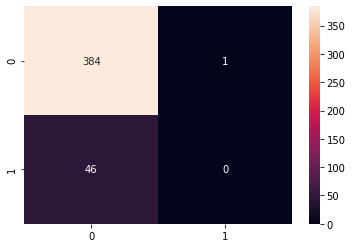

In [45]:
sns.heatmap(confusion_matrix(test_y,predictions), annot=True, fmt='d')

In [46]:
# We have less False Positive so its fine.

In [47]:
from sklearn.model_selection import GridSearchCV

# Random Forest Tuning

In [48]:
print('Current Status Of Algorithm Parameters')
print('--------------------------------------')
print(Forest_Gini.get_params())

Current Status Of Algorithm Parameters
--------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [49]:
Forest = RandomForestClassifier()

In [50]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [51]:
grid_search = GridSearchCV(estimator = Forest, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [52]:
grid_search.fit(train_x, train_y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [53]:
best_grid = grid_search.best_estimator_

In [54]:
score = best_grid.score(test_x, test_y) * 100
old_score = 0.8909512761020881 * 100

In [55]:
print(f'Before Tuning: {0.8909512761020881 * 100}')
print(f'After Tuning: {score}')
increase = score - old_score
print(increase / score * 100, ' % improvement ') 

Before Tuning: 89.0951276102088
After Tuning: 89.32714617169374
0.2597402597402779  % improvement 


In [56]:
from matplotlib.colors import ListedColormap

# Support Vector Classifier

In [57]:
vmc = SVC().fit(train_x, train_y)

In [58]:
vmc.score(test_x, test_y)

0.8932714617169374

In [60]:
predictions = vmc.predict(test_x)

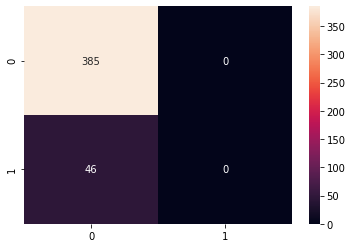

In [69]:
# Confusion Matrix
sns.heatmap(confusion_matrix(test_y,predictions) ,annot = True, fmt = 'd')

In [63]:
# We are only Getting False Negative Looks like we have some problem

In [65]:
test_y[test_y == 1].count()

46

In [71]:
%%capture
"""
All True 1s are being classified as False Negative same as in the RandomForet ^^ We need to check whats causing this problem.
"""

# Problem Solving

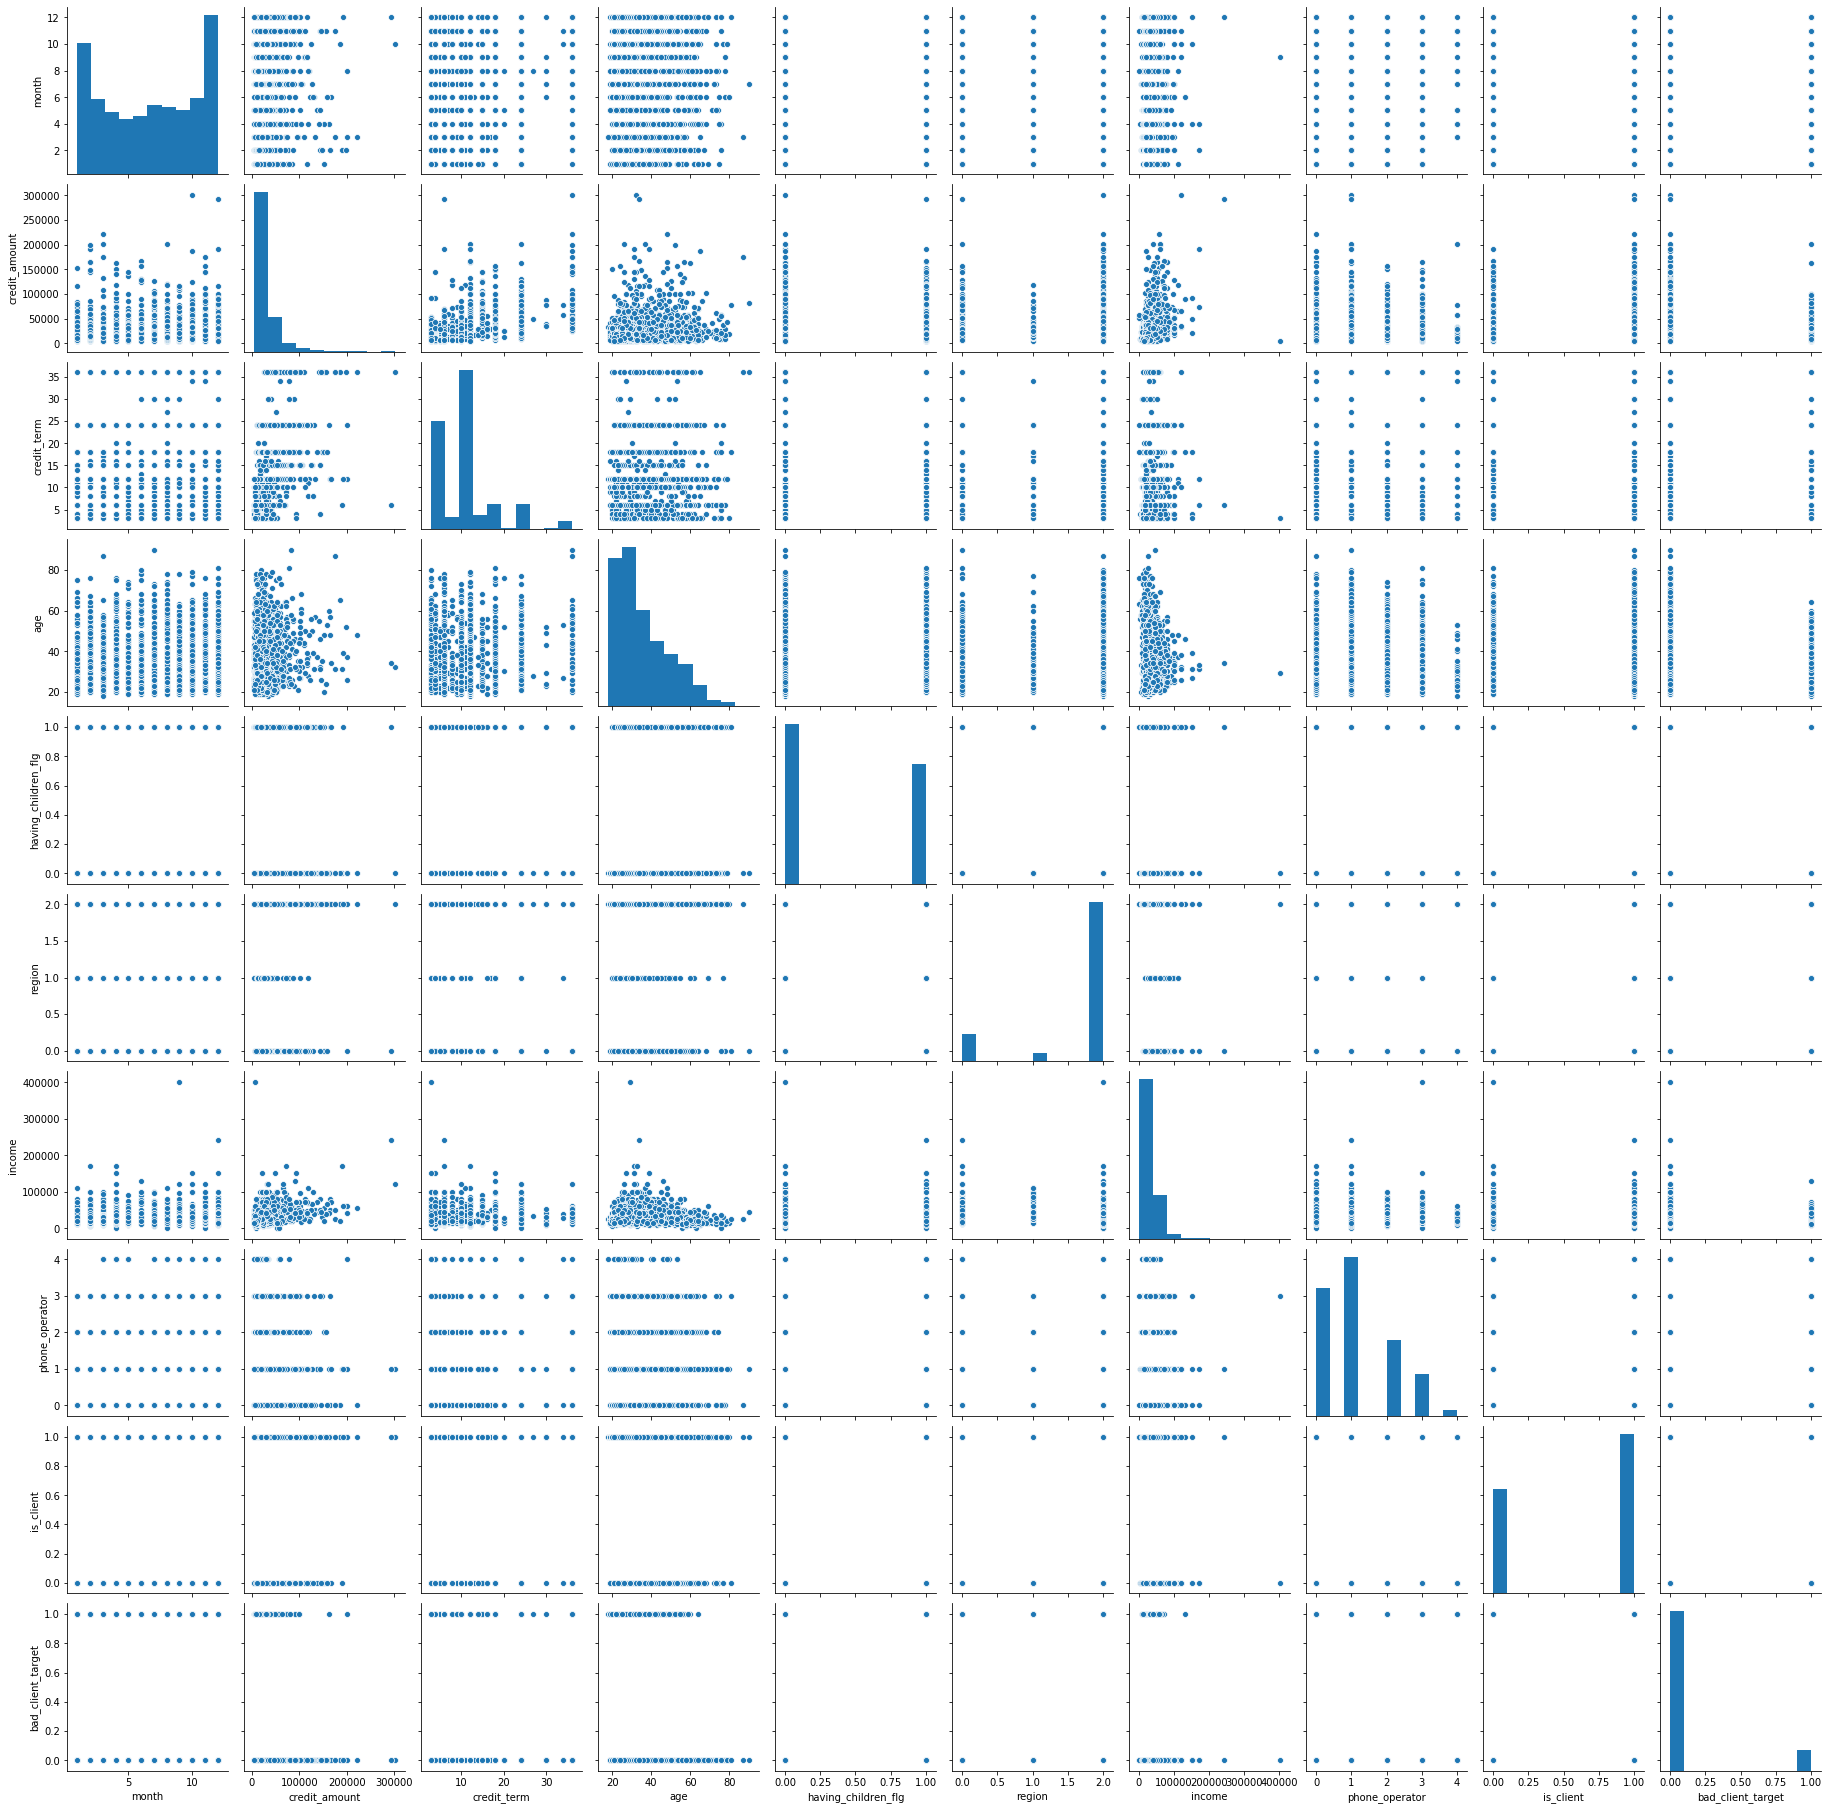

In [73]:
# Basic correlogram
sns.pairplot(dataset)
plt.show()

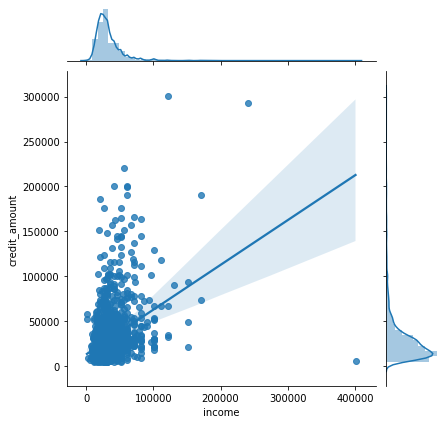

In [74]:
# Regression Graph Between Income & Credit Amount
sns.jointplot('income', 'credit_amount', data=dataset, kind='reg') 

In [75]:
# Lets Go with this one

In [76]:
sns.set()

In [77]:
x_set, y_set = train_x.values, train_y.values

In [90]:
train_x.head()

,month,credit_amount,credit_term,age,having_children_flg,region,income,phone_operator,is_client,education,...,Jewelry,Medical services,Music,Repair Services,Sporting goods,Tourism,Training,Windows & Doors,Married,Unmarried
453,-0.765555,-0.170662,0.069240,-0.298236,1.155287,0.452567,-0.318186,1.845975,-1.236973,0,...,0,0,0,0,0,0,0,0,0,0
1298,0.930610,0.635250,-0.083514,-0.145755,1.155287,-2.388134,0.160120,-1.108156,0.808425,4,...,0,0,0,0,0,0,0,0,0,0
819,0.082528,-0.367663,0.069240,2.827623,-0.865586,0.452567,-0.796492,-1.108156,0.808425,5,...,0,0,0,0,0,0,0,1,0,0
1469,1.213304,-0.797483,-0.236268,0.159207,1.155287,0.452567,0.160120,-1.108156,0.808425,5,...,0,0,0,0,0,0,0,0,0,0
1007,0.365222,-0.546754,0.069240,-0.908160,-0.865586,0.452567,-0.318186,-1.108156,-1.236973,5,...,0,0,0,0,0,0,0,0,1,0


In [97]:
x_set[:, 6] # Index 6
x_set[:, 1] # Index 1

array([-0.17066193,  0.6352503 , -0.3676627 , ...,  1.11879763,
       -0.76166423, -0.61839095])

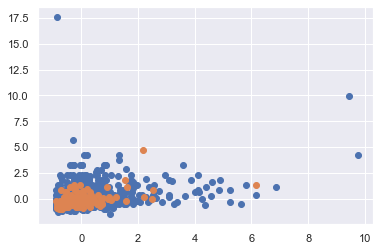

In [99]:
for i, ii in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == i, 1], x_set[y_set == ii, 6],
                cmap = ListedColormap(('red', 'blue'))(i), label = ii)

In [100]:
# To Be Continued ! New Project Found